In [1]:
# !pip install wheel cupy numpy

In [2]:
# The dataset consists of 3 drones, and 1 background
!ls data/DroneRF

ardrone  backgroundrfactivities  bepopdrone  phantomdrone


## Format
10100H_0.csv is the format for each segment. The filename represents the metadata, described as follows.
<img src="codes.png" alt="codes" style="width: 400px;"/>

<b>101</b>00H_0.csv

First three numbers in the filename represents the drone mode.
- Background: 000
- ardrone: 101
- bepopdrone: 100
- phantomdrone: 110


101<b>00</b>H_0.csv

4th and 5th number represents a binary for mode. There are a total of 4 modes. Available modes are 
- 1: 'On and Connected',
- 2: 'Hovering Automatically',
- 3: 'Flying no recording',
- 4: 'Flying and recording'

10100<b>H</b>_0.csv

6th character is either a H or L, the data is cut into 2 halves of 1 mil samples each.

10100H_<b>0</b>.csv

The character after the underscore represents the segment number

In [3]:
!tree data/DroneRF

data/DroneRF
├── ardrone
│   ├── 10100H_0.csv
│   ├── 10100H_1.csv
│   ├── 10100H_10.csv
│   ├── 10100H_11.csv
│   ├── 10100H_12.csv
│   ├── 10100H_13.csv
│   ├── 10100H_14.csv
│   ├── 10100H_15.csv
│   ├── 10100H_16.csv
│   ├── 10100H_17.csv
│   ├── 10100H_18.csv
│   ├── 10100H_19.csv
│   ├── 10100H_2.csv
│   ├── 10100H_20.csv
│   ├── 10100H_3.csv
│   ├── 10100H_4.csv
│   ├── 10100H_5.csv
│   ├── 10100H_6.csv
│   ├── 10100H_7.csv
│   ├── 10100H_8.csv
│   ├── 10100H_9.csv
│   ├── 10100L_0.csv
│   ├── 10100L_1.csv
│   ├── 10100L_10.csv
│   ├── 10100L_11.csv
│   ├── 10100L_12.csv
│   ├── 10100L_13.csv
│   ├── 10100L_14.csv
│   ├── 10100L_15.csv
│   ├── 10100L_16.csv
│   ├── 10100L_17.csv
│   ├── 10100L_18.csv
│   ├── 10100L_19.csv
│   ├── 10100L_2.csv
│   ├── 10100L_20.csv
│   ├── 10100L_3.csv
│   ├── 10100L_4.csv
│   ├── 10100L_5.csv
│   ├── 10100L_6.csv
│   ├── 10100L_7.csv
│   ├── 10100L_8.csv
│   ├── 10100L_9.csv
│   ├── 10101H_0.csv
│   ├── 10101H_1.csv
│   ├── 10101H_10.csv
│   ├──

In [4]:
#A typical file size of each csv is around 90M. We need an efficient way to process this.
!ls -llh data/DroneRF/ardrone/*

-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_0.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_1.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_10.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_11.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_12.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_13.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_14.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_15.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_16.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_17.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_18.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_19.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_2.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 da

In [16]:
#Loading one segment for analysis
import numpy as np
ardrone_segment_18_h=np.loadtxt('data/DroneRF/ardrone/10100H_18.csv', delimiter=",")
ardrone_segment_18_l=np.loadtxt('data/DroneRF/ardrone/10100L_18.csv', delimiter=",")
ardrone_segment_9_h=np.loadtxt('data/DroneRF/ardrone/10100H_9.csv', delimiter=",")
ardrone_segment_9_l=np.loadtxt('data/DroneRF/ardrone/10100L_9.csv', delimiter=",")

print("ARDrone Segment 18 L consists of {0} freq samples with a min/max of {1}/{2}".format(ardrone_segment_18_l.shape[0],min(ardrone_segment_18_l),max(ardrone_segment_18_l)))
print("ARDrone Segment 18 H consists of {0} freq samples with a min/max of {1}/{2}".format(ardrone_segment_18_h.shape[0],min(ardrone_segment_18_h),max(ardrone_segment_18_h)))

print("ARDrone Segment 9 L consists of {0} freq samples with a min/max of {1}/{2}".format(ardrone_segment_9_l.shape[0],min(ardrone_segment_9_l),max(ardrone_segment_9_l)))
print("ARDrone Segment 9 H consists of {0} freq samples with a min/max of {1}/{2}".format(ardrone_segment_9_h.shape[0],min(ardrone_segment_9_h),max(ardrone_segment_9_h)))

ARDrone Segment 18 L consists of 10000000 freq samples with a min/max of -8338.0/8213.0
ARDrone Segment 18 H consists of 10000000 freq samples with a min/max of -220.0/182.0
ARDrone Segment 9 L consists of 10000000 freq samples with a min/max of -7892.0/8376.0
ARDrone Segment 9 H consists of 10000000 freq samples with a min/max of -206.0/203.0


In [17]:
print("Each segment consists of a upper and lower freq range, specifically")
print("2.4Ghz to 2.44Ghz and\n2.44Ghz to 2.48Ghz\n")
print("This means each sample is seperated by {0} hz".format(40*1000000/ardrone_segment_18_l.shape[0]))

Each segment consists of a upper and lower freq range, specifically
2.4Ghz to 2.44Ghz and
2.44Ghz to 2.48Ghz

This means each sample is seperated by 4.0 hz


So it would seem that for AR Drone, a L segment has a much larger amplitude variation compared to a H segment for the same mode. Lets do a check for bepopdrone.

In [18]:
#Loading one segment for analysis
import numpy as np
bepopdrone_segment_18_h=np.loadtxt('data/DroneRF/bepopdrone/10011H_18.csv', delimiter=",")
bepopdrone_segment_18_l=np.loadtxt('data/DroneRF/bepopdrone/10011L_18.csv', delimiter=",")
bepopdrone_segment_9_h=np.loadtxt('data/DroneRF/bepopdrone/10011H_9.csv', delimiter=",")
bepopdrone_segment_9_l=np.loadtxt('data/DroneRF/bepopdrone/10011L_9.csv', delimiter=",")

print("bepop drone Segment 18 L consists of {0} freq samples with a min/max of {1}/{2}".format(bepopdrone_segment_18_l.shape[0],min(bepopdrone_segment_18_l),max(bepopdrone_segment_18_l)))
print("bepop drone Segment 18 H consists of {0} freq samples with a min/max of {1}/{2}".format(bepopdrone_segment_18_h.shape[0],min(bepopdrone_segment_18_h),max(bepopdrone_segment_18_h)))

print("bepop drone Segment 9 L consists of {0} freq samples with a min/max of {1}/{2}".format(bepopdrone_segment_9_l.shape[0],min(bepopdrone_segment_9_l),max(bepopdrone_segment_9_l)))
print("bepop drone Segment 9 H consists of {0}   freq samples with a min/max of {1}/{2}".format(bepopdrone_segment_9_h.shape[0],min(bepopdrone_segment_9_h),max(bepopdrone_segment_9_h)))

bepop drone Segment 18 L consists of 10000000 freq samples with a min/max of -8964.0/9546.0
bepop drone Segment 18 H consists of 10000000 freq samples with a min/max of -243.0/234.0
bepop drone Segment 9 L consists of 10000000 freq samples with a min/max of -11469.0/11446.0
bepop drone Segment 9 H consists of 10000000   freq samples with a min/max of -245.0/235.0


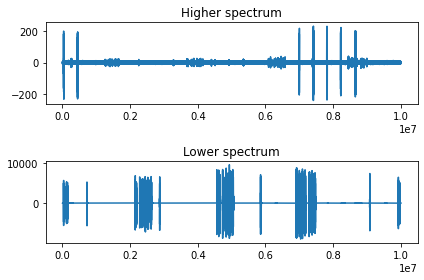

In [11]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(bepopdrone_segment_18_h)
axs[0].set_title('Higher spectrum')
axs[1].plot(bepopdrone_segment_18_l)
axs[1].set_title('Lower spectrum')
fig.tight_layout()

The lower spectrum has larger amplitude variation from higher spectrum

Now lets take a look at same drone, same spectrum and segment but a different code.

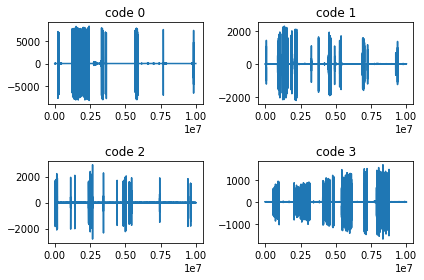

In [16]:
import numpy as np
ardrone_segment_18_l_code0=np.loadtxt('data/DroneRF/ardrone/10100L_8.csv', delimiter=",")
ardrone_segment_18_l_code1=np.loadtxt('data/DroneRF/ardrone/10101L_8.csv', delimiter=",")
ardrone_segment_18_l_code2=np.loadtxt('data/DroneRF/ardrone/10110L_8.csv', delimiter=",")
ardrone_segment_18_l_code3=np.loadtxt('data/DroneRF/ardrone/10111L_8.csv', delimiter=",")

fig, axs = plt.subplots(2,2)
axs[0][0].plot(ardrone_segment_18_l_code0)
axs[0][0].set_title('code 0')
axs[0][1].plot(ardrone_segment_18_l_code1)
axs[0][1].set_title('code 1')

axs[1][0].plot(ardrone_segment_18_l_code2)
axs[1][0].set_title('code 2')

axs[1][1].plot(ardrone_segment_18_l_code3)
axs[1][1].set_title('code 3')


fig.tight_layout()

The signals demonstrated from different codes showed that they are highly distinguishable. Now lets look at same codes from different segments.

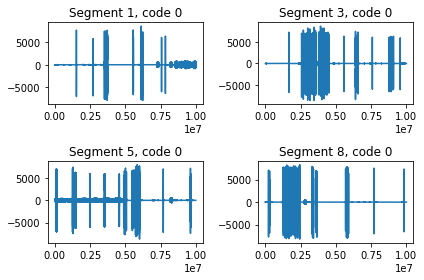

In [17]:
ardrone_segment_1_l_code0=np.loadtxt('data/DroneRF/ardrone/10100L_1.csv', delimiter=",")
ardrone_segment_3_l_code0=np.loadtxt('data/DroneRF/ardrone/10100L_3.csv', delimiter=",")
ardrone_segment_5_l_code0=np.loadtxt('data/DroneRF/ardrone/10100L_5.csv', delimiter=",")
ardrone_segment_8_l_code0=np.loadtxt('data/DroneRF/ardrone/10100L_8.csv', delimiter=",")

fig, axs = plt.subplots(2,2)
axs[0][0].plot(ardrone_segment_1_l_code0)
axs[0][0].set_title('Segment 1, code 0')
axs[0][1].plot(ardrone_segment_3_l_code0)
axs[0][1].set_title('Segment 3, code 0')

axs[1][0].plot(ardrone_segment_5_l_code0)
axs[1][0].set_title('Segment 5, code 0')

axs[1][1].plot(ardrone_segment_8_l_code0)
axs[1][1].set_title('Segment 8, code 0')


fig.tight_layout()